## ALY6015 Final Project

### Jessica Jiang

In [1]:
#liabrary TTR
#library lubridate for manipulate date
#library ggplot2 for plot
#library dplyr for manipulate data
#library plyr for manipulate data
#library forecast for forecaste
#library plotly for plot
#library NbClust for clustering data
#libary mlbench for machine learning benchmark
#library glmnet for multiple regression
library("TTR")
library("lubridate")
library("ggplot2")
library("dplyr")
library("plyr")
library("forecast")
library("plotly")
library("NbClust")
library("mlbench")
library("glmnet")

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
---------------------------------------------------------------

In [2]:
#Load data
x<- "C:/Users/jessi/OneDrive/Desktop/ALY 6015/WK6 Final Project/data.csv"
df <- read.csv(file = x)

In [3]:
head(df)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [4]:
str(df)

'data.frame':	541909 obs. of  8 variables:
 $ InvoiceNo  : Factor w/ 25900 levels "536365","536366",..: 1 1 1 1 1 1 1 2 2 3 ...
 $ StockCode  : Factor w/ 4070 levels "10002","10080",..: 3538 2795 3045 2986 2985 1663 801 1548 1547 3306 ...
 $ Description: Factor w/ 4224 levels ""," 4 PURPLE FLOCK DINNER CANDLES",..: 4027 4035 932 1959 2980 3235 1573 1698 1695 259 ...
 $ Quantity   : int  6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: Factor w/ 23260 levels "1/10/2011 10:04",..: 6839 6839 6839 6839 6839 6839 6839 6840 6840 6841 ...
 $ UnitPrice  : num  2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : int  17850 17850 17850 17850 17850 17850 17850 17850 17850 13047 ...
 $ Country    : Factor w/ 38 levels "Australia","Austria",..: 36 36 36 36 36 36 36 36 36 36 ...


In [5]:
summary(df)

   InvoiceNo        StockCode                                  Description    
 573585 :  1114   85123A :  2313   WHITE HANGING HEART T-LIGHT HOLDER:  2369  
 581219 :   749   22423  :  2203   REGENCY CAKESTAND 3 TIER          :  2200  
 581492 :   731   85099B :  2159   JUMBO BAG RED RETROSPOT           :  2159  
 580729 :   721   47566  :  1727   PARTY BUNTING                     :  1727  
 558475 :   705   20725  :  1639   LUNCH BAG RED RETROSPOT           :  1638  
 579777 :   687   84879  :  1502   ASSORTED COLOUR BIRD ORNAMENT     :  1501  
 (Other):537202   (Other):530366   (Other)                           :530315  
    Quantity                   InvoiceDate       UnitPrice        
 Min.   :-80995.00   10/31/2011 14:41:  1114   Min.   :-11062.06  
 1st Qu.:     1.00   12/8/2011 9:28  :   749   1st Qu.:     1.25  
 Median :     3.00   12/9/2011 10:03 :   731   Median :     2.08  
 Mean   :     9.55   12/5/2011 17:24 :   721   Mean   :     4.61  
 3rd Qu.:    10.00   6/29/2011 15

In [6]:
##filter out NA data
NA_data<- df%>%
select(InvoiceNo, StockCode,Quantity, InvoiceDate, UnitPrice, CustomerID)%>%
filter(is.na(CustomerID))
head(NA_data)

InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
536414,22139,56,12/1/2010 11:52,0.00,NA
536544,21773,1,12/1/2010 14:32,2.51,NA
536544,21774,2,12/1/2010 14:32,2.51,NA
536544,21786,4,12/1/2010 14:32,0.85,NA
536544,21787,2,12/1/2010 14:32,1.66,NA
536544,21790,9,12/1/2010 14:32,1.66,NA


##### Only customer ID missing,other information is intergrated

In [7]:
#cacluate each product sales amount
df <- df %>% mutate(lineTotal = Quantity * UnitPrice)
df$date_only<-sapply(as.character(df$InvoiceDate), FUN = function(x) {strsplit(x, split = '[ ]')[[1]][1]})
df$time<-sapply(as.character(df$InvoiceDate), FUN = function(x) {strsplit(x, split = '[ ]')[[1]][2]})

# create month, year and hour of day variables
df$month <- sapply(df$date_only, FUN = function(x) {strsplit(x, split = '[/]')[[1]][1]})
df$year <- sapply(df$date_only, FUN = function(x) {strsplit(x, split = '[/]')[[1]][3]})
df$hourOfDay <- sapply(df$time, FUN = function(x) {strsplit(x, split = '[:]')[[1]][1]})



In [8]:
#adjust date formate
df$date_only <- as.Date(df$date_only, "%m/%d/%Y")
df$dayOfWeek <- wday(df$date, label=TRUE)


In [9]:
df$week<-week(df$date)
df$month<-month(ymd(df$date_only),label=FALSE, abbr=FALSE)

In [10]:
# aggregate by invoice number
df_new<-df%>%
    group_by(year,CustomerID,InvoiceNo)%>%
    summarise_at(vars(lineTotal),list(Total=sum))
head(df_new)
tail(df_new)

year,CustomerID,InvoiceNo,Total
2010,12347,537626,711.79
2010,12348,539318,892.80
2010,12370,538826,1590.82
2010,12370,539330,277.20
2010,12377,539488,1001.52
2010,12383,539840,600.72


year,CustomerID,InvoiceNo,Total
2011,NA,C577779,-288.00
2011,NA,C578097,-1208.04
2011,NA,C579757,-15.60
2011,NA,C579907,-15.30
2011,NA,C580604,-11586.50
2011,NA,C580605,-17836.46


#### There are lots of canceled order, then I am going to count how many invoices been canceled in these two year and the percentage

In [11]:
#create column record invoice status
df$invoice_status<- ifelse(test=grepl("C", df$InvoiceNo), yes = 1, no = 0)
head(df)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lineTotal,date_only,time,month,year,hourOfDay,dayOfWeek,week,invoice_status
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010-12-01,8:26,12,2010,8,Wed,48,0
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01,8:26,12,2010,8,Wed,48,0
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010-12-01,8:26,12,2010,8,Wed,48,0
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01,8:26,12,2010,8,Wed,48,0
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01,8:26,12,2010,8,Wed,48,0
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30,2010-12-01,8:26,12,2010,8,Wed,48,0


In [12]:
#caculate the numbers of cancel invoice
Invoice.summary<-df %>%
        mutate(invoice_status=(as.character(invoice_status)))%>%
        group_by(year, month) %>%
        summarise(total.count=n(),cancel.invoice= sum(invoice_status == 1))
Invoice.summary<-Invoice.summary %>% mutate(return.rate=cancel.invoice/total.count*100)                   
Invoice.summary 

year,month,total.count,cancel.invoice,return.rate
2010,12,42481,728,1.713707
2011,1,35147,701,1.994480
2011,2,27707,475,1.714368
2011,3,36748,699,1.902144
2011,4,29916,559,1.868565
2011,5,37030,621,1.677019
2011,6,36874,711,1.928188
2011,7,39518,685,1.733387
2011,8,35284,668,1.893209
2011,9,50226,805,1.602756


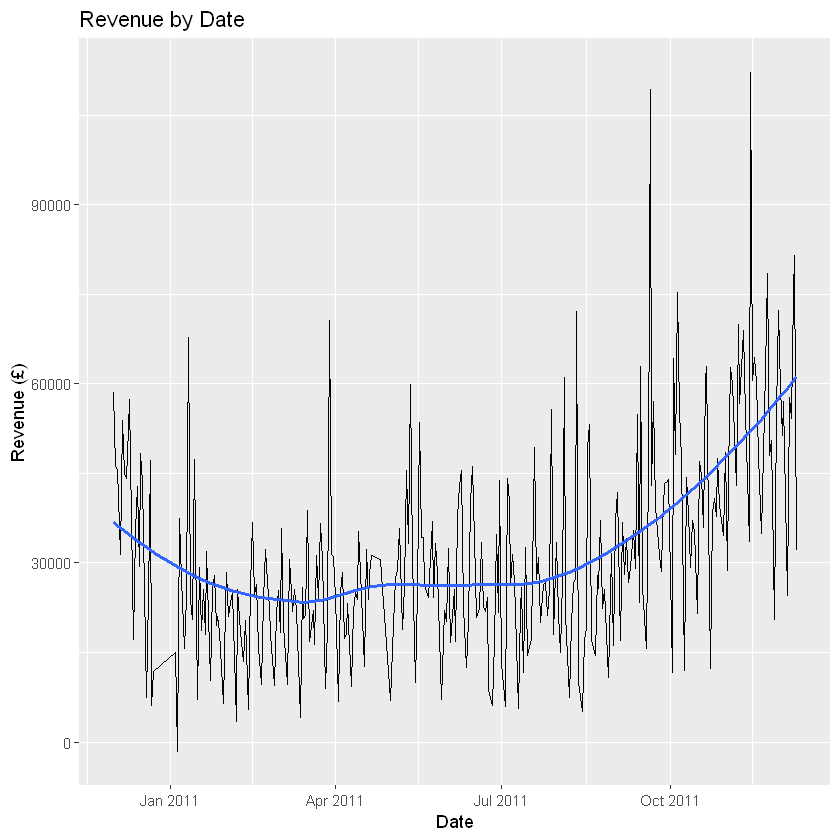

In [13]:
#Overview two years sales trend
df %>%
  group_by(date_only) %>%
  summarise(revenue = sum(lineTotal)) %>%
  ggplot(aes(x = date_only, y = revenue)) + geom_line() +
  geom_smooth(method = 'loess', se = FALSE)+
  labs(x = "Date", y = "Revenue (£)", title = "Revenue by Date")

In [14]:
#Revenue by each month
MoR<-df%>%
    group_by(year, month)%>%
    summarise(revenue= sum(lineTotal))%>%
    mutate(yearmon = paste(year, month, sep = "-")) %>%
    arrange(year, month)
MoR

year,month,revenue,yearmon
2010,12,748957.0,2010-12
2011,1,560000.3,2011-1
2011,2,498062.6,2011-2
2011,3,683267.1,2011-3
2011,4,493207.1,2011-4
2011,5,723333.5,2011-5
2011,6,691123.1,2011-6
2011,7,681300.1,2011-7
2011,8,682680.5,2011-8
2011,9,1019687.6,2011-9


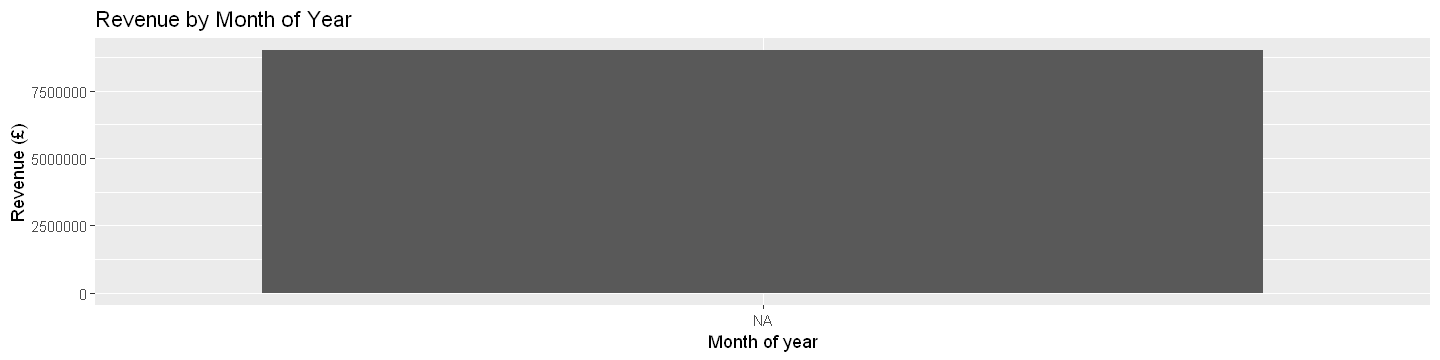

In [15]:
#2011 Sales Revenue analysis
options(repr.plot.width=12, repr.plot.height=3)
MoR%>%
 filter(year==2011)%>%
    ggplot(aes(x = factor(month, levels=month.name), y = revenue)) + geom_col() + 
    labs(x = "Month of year", y = "Revenue (£)", title = "Revenue by Month of Year")


#### Nov has the highest sales revenue

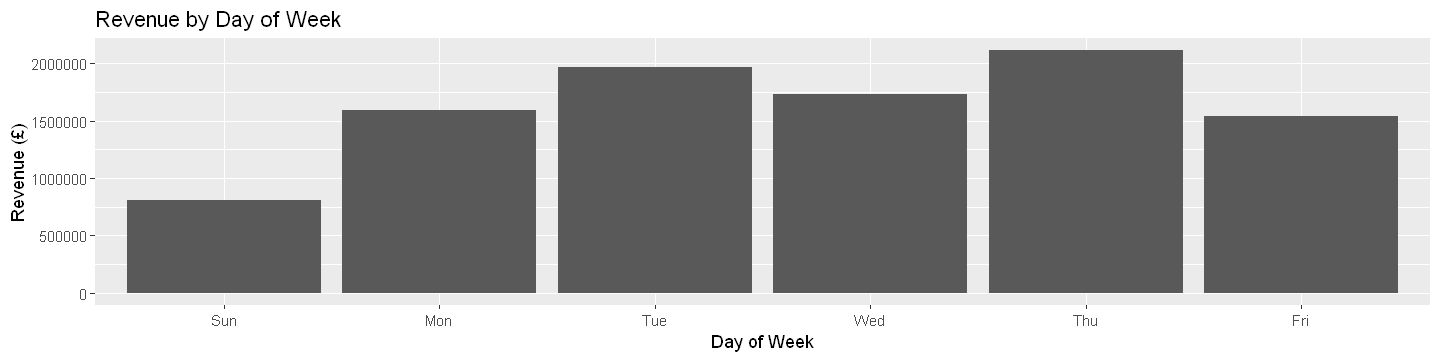

In [16]:
#Day of week analysis
df%>%
  group_by(dayOfWeek) %>%
  summarise(revenue = sum(lineTotal)) %>%
  ggplot(aes(x = dayOfWeek, y = revenue)) + geom_col() + 
  labs(x = "Day of Week", y = "Revenue (£)", title = "Revenue by Day of Week")

#### In this diagram, we find there is no data shows on Saturday, and Thursday has highest sales number

In [17]:
##Revenue details by Day of week
weekdaydetail <- df %>%
  group_by(date_only, dayOfWeek) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrd = (round((revenue / transactions),2))) %>%
  ungroup()
tail(weekdaydetail)

date_only,dayOfWeek,revenue,transactions,aveOrd
2011-12-04,Sun,24565.78,72,341.19
2011-12-05,Mon,57751.32,151,382.46
2011-12-06,Tue,54228.37,149,363.95
2011-12-07,Wed,75076.22,138,544.03
2011-12-08,Thu,81417.78,145,561.50
2011-12-09,Fri,32131.53,49,655.75


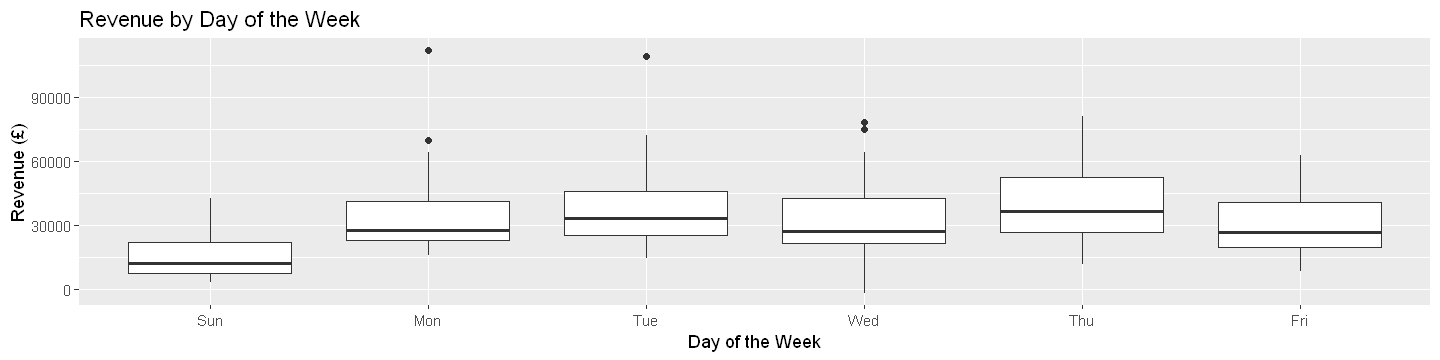

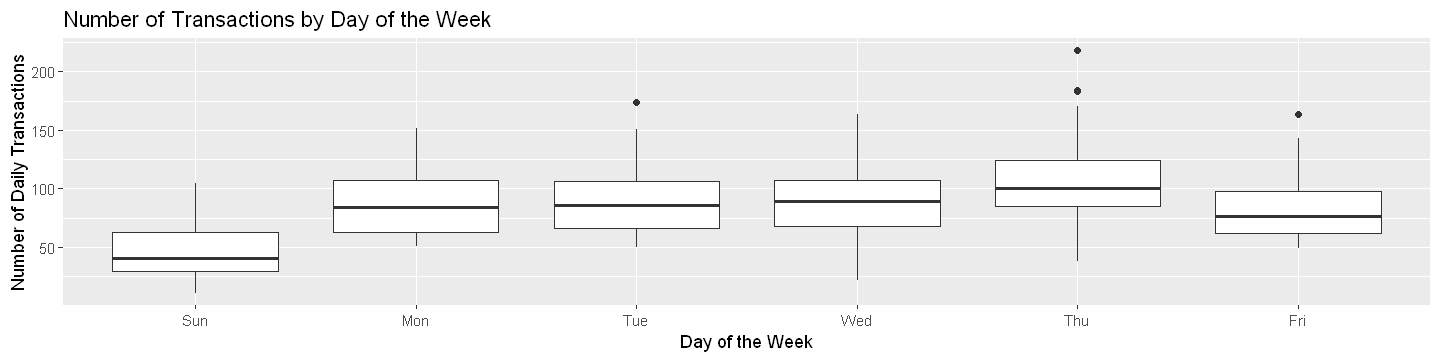

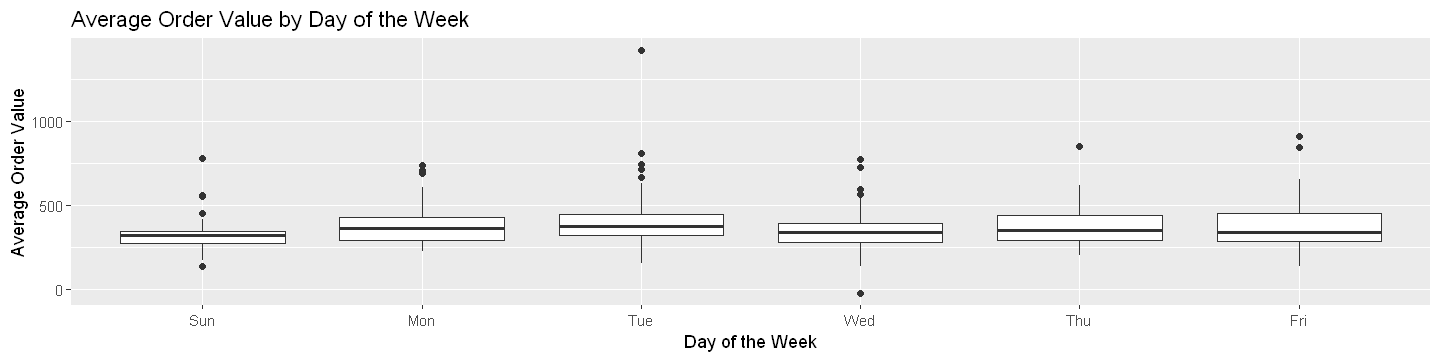

In [18]:
##Boxplot of each detail
Rev<-ggplot(weekdaydetail, aes(x = dayOfWeek, y = revenue)) + geom_boxplot() + 
    labs(x = "Day of the Week", y = "Revenue (£)", title = 'Revenue by Day of the Week')
Tran<-ggplot(weekdaydetail, aes(x = dayOfWeek, y = transactions)) + geom_boxplot() + 
    labs(x = "Day of the Week", y = 'Number of Daily Transactions', title = 'Number of Transactions by Day of the Week')
Avg_Order<-ggplot(weekdaydetail, aes(x = dayOfWeek, y = aveOrd)) + geom_boxplot() + 
    labs(x = 'Day of the Week', y = 'Average Order Value', title = 'Average Order Value by Day of the Week')
Rev
Tran
Avg_Order

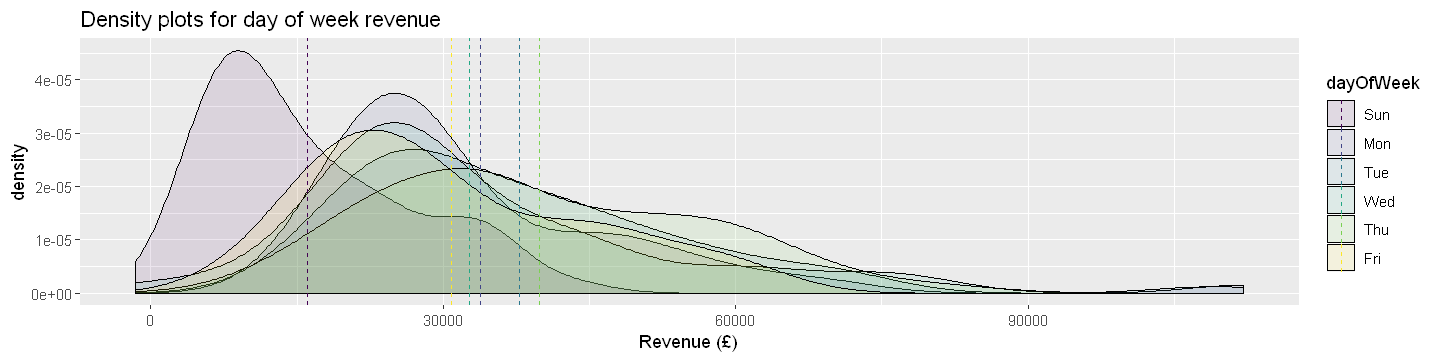

In [19]:
#Density plots - revenue
revenue_mu <- ddply(weekdaydetail, "dayOfWeek", summarise, grp.mean=mean(revenue))
ggplot(weekdaydetail, aes(revenue, fill=dayOfWeek)) + geom_density(alpha=0.1)+
geom_vline(data=revenue_mu, aes(xintercept=grp.mean, color=dayOfWeek),linetype="dashed")+
labs(x = "Revenue (£)", y = "density", title = "Density plots for day of week revenue")


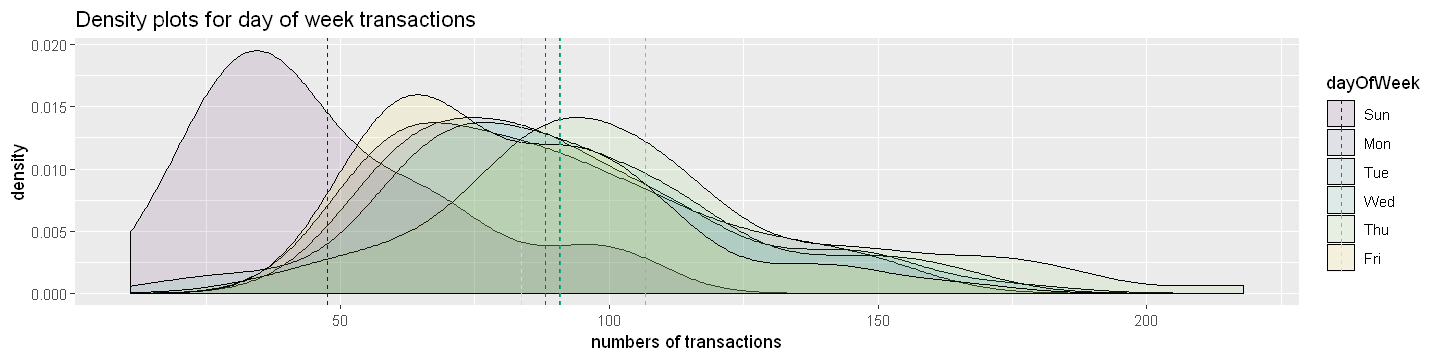

In [20]:
#Density plots - transations
transaction_mu <- ddply(weekdaydetail, "dayOfWeek", summarise, grp.mean=mean(transactions))
ggplot(weekdaydetail, aes(transactions, fill = dayOfWeek)) + geom_density(alpha=0.1)+
geom_vline(data=transaction_mu, aes(xintercept=grp.mean, color=dayOfWeek),linetype="dashed")+
labs(x = "numbers of transactions", y = 'density', title = 'Density plots for day of week transactions')

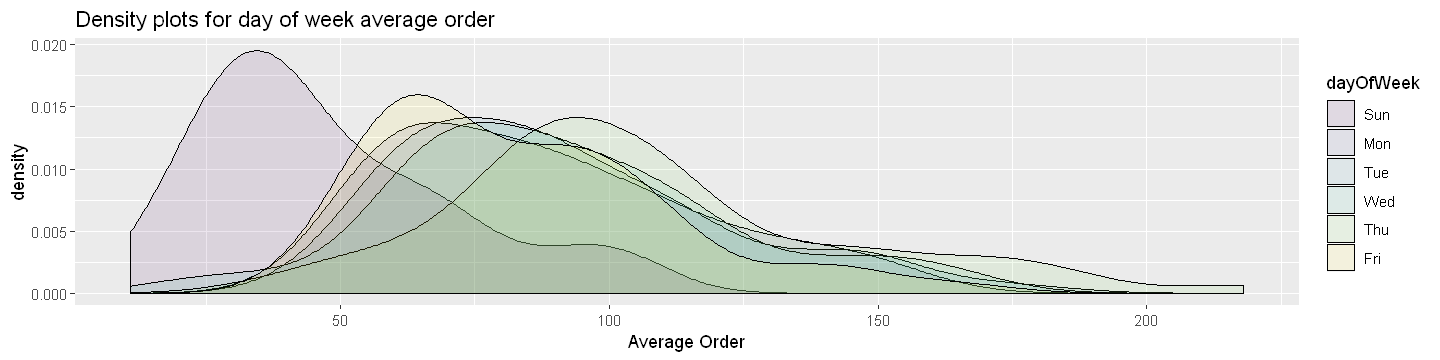

In [21]:
#Density plots - AvgOrder
ggplot(weekdaydetail, aes(transactions, fill = dayOfWeek)) + geom_density(alpha=0.1)+
labs(x = "Average Order", y = 'density', title = 'Density plots for day of week average order')

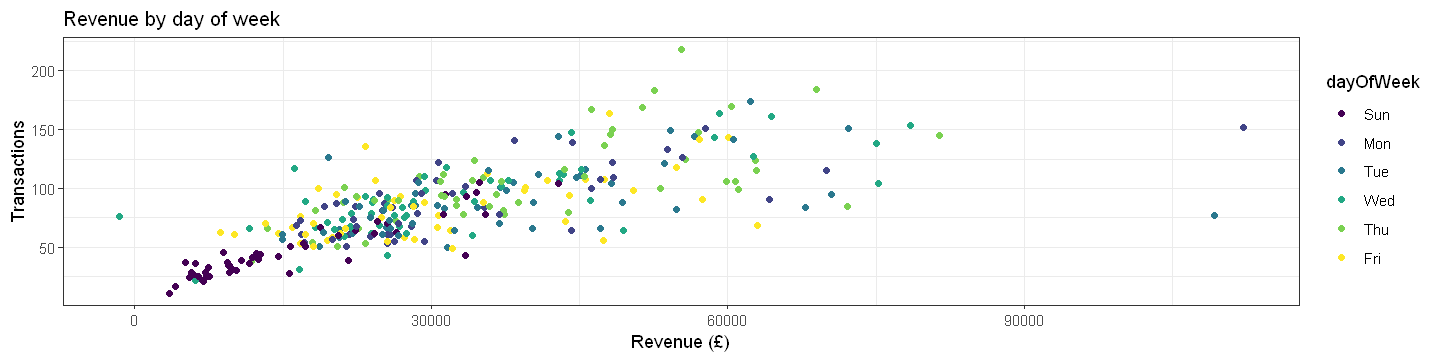

In [22]:
#corelation between transactions and revenue
ggplot(weekdaydetail, aes(x=revenue, y=transactions,color=dayOfWeek))+ geom_point()+
ggtitle("Revenue by day of week")+theme_bw() + xlab("Revenue (£)") + ylab("Transactions")+
theme (plot.title = element_text(size = 12))

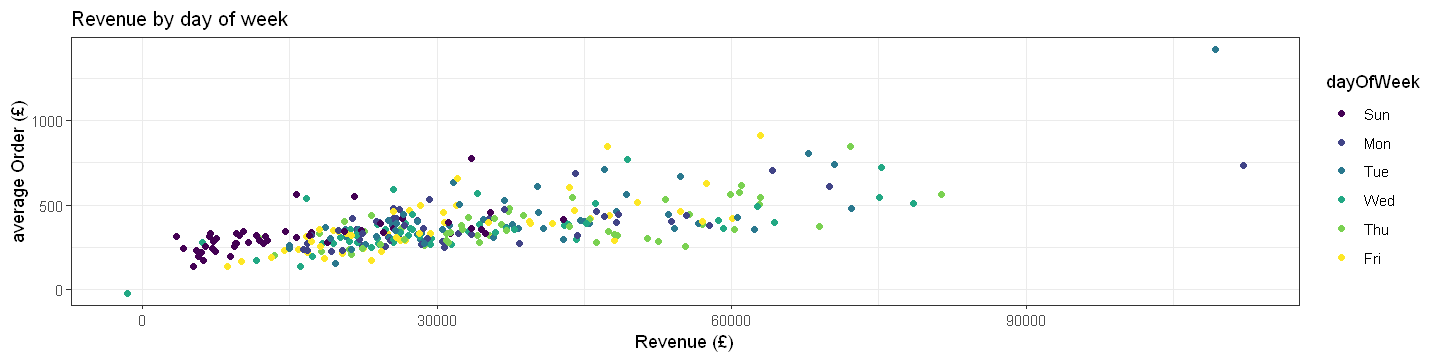

In [23]:
#corelation between transactions and average order
ggplot(weekdaydetail, aes(x=revenue, y=aveOrd,color=dayOfWeek))+ geom_point()+
ggtitle("Revenue by day of week")+theme_bw() + xlab("Revenue (£)") + ylab("average Order (£)")+
theme (plot.title = element_text(size = 12))

In [24]:
## lm model deploy to revenue vs numbers of transactions
logbooks <- weekdaydetail[,3:5]
logbooks.lm1 <- lm(revenue~transactions, data = logbooks, na.rm=TRUE)
summary(logbooks.lm1)

## lm model deploy to revenue vs numbers of transactions and average order
logbooks.lm2<- lm(revenue~transactions+aveOrd, data=logbooks, na.rm=TRUE)
summary(logbooks.lm2)

Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'na.rm' will be disregarded"


Call:
lm(formula = revenue ~ transactions, data = logbooks, na.rm = TRUE)

Residuals:
   Min     1Q Median     3Q    Max 
-30252  -6355  -1921   3853  80233 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    785.28    1836.54   0.428    0.669    
transactions   367.11      20.05  18.309   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12020 on 303 degrees of freedom
Multiple R-squared:  0.5252,	Adjusted R-squared:  0.5237 
F-statistic: 335.2 on 1 and 303 DF,  p-value: < 2.2e-16


Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'na.rm' will be disregarded"


Call:
lm(formula = revenue ~ transactions + aveOrd, data = logbooks, 
    na.rm = TRUE)

Residuals:
     Min       1Q   Median       3Q      Max 
-15552.7  -1266.2   -186.3   1394.9  27580.7 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -27847.382    823.073  -33.83   <2e-16 ***
transactions    355.621      6.529   54.47   <2e-16 ***
aveOrd           79.094      1.563   50.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3911 on 302 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9496 
F-statistic:  2863 on 2 and 302 DF,  p-value: < 2.2e-16


#### There is a positve correlation between transactions and revenue

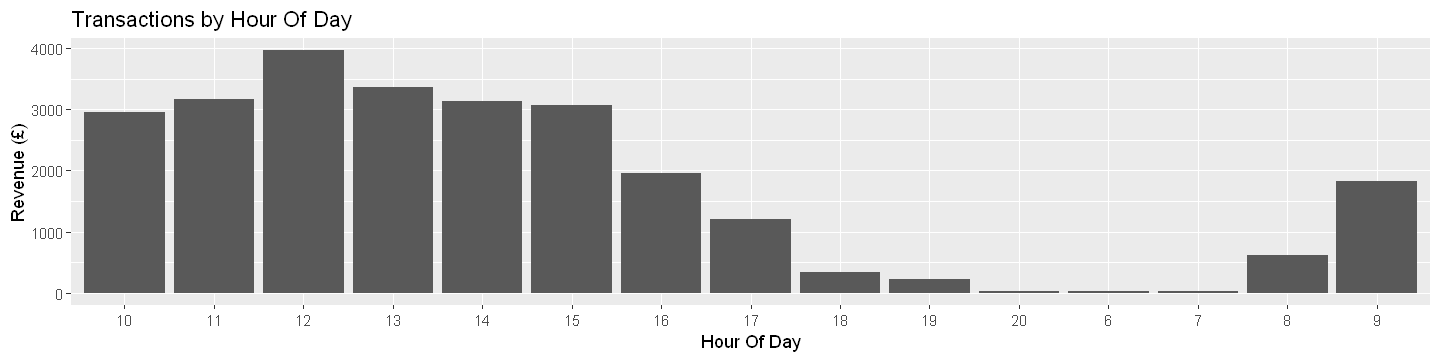

In [25]:
#Customer shopping behavior analysis
df %>%
  group_by(hourOfDay) %>%
  summarise(transactions = n_distinct(InvoiceNo)) %>%
  ggplot(aes(x = hourOfDay, y = transactions)) + geom_col()+
  labs(x = "Hour Of Day", y = "Revenue (£)", title = "Transactions by Hour Of Day")

#### customer like to shopping during the lunch break

In [26]:
# Transaction Distribution
TransactionDistribution <- df %>%
  group_by(Country) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo),customers = n_distinct(CustomerID)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))
head(TransactionDistribution,10)

Country,revenue,transactions,customers,aveOrdVal
United Kingdom,8187806.36,23494,3951,348.51
Netherlands,284661.54,101,9,2818.43
EIRE,263276.82,360,4,731.32
Germany,221698.21,603,95,367.66
France,197403.90,461,88,428.21
Australia,138467.41,72,9,1923.16
Switzerland,56164.34,76,21,739.00
Spain,56037.18,106,30,528.65
Belgium,41265.88,119,24,346.77
Sweden,36595.91,46,8,795.56


In [27]:
#Top 10 customer ID
custSummary <- df %>%
  group_by(CustomerID)%>%
  filter(!is.na(CustomerID))%>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))

head(custSummary,10)

CustomerID,revenue,transactions,aveOrdVal
14646,279489.02,77,3629.73
18102,256438.49,62,4136.10
17450,187482.17,55,3408.77
14911,132572.62,248,534.57
12415,123725.45,26,4758.67
14156,113384.14,66,1717.94
17511,88125.38,46,1915.77
16684,65892.08,31,2125.55
13694,62653.10,60,1044.22
15311,59419.34,118,503.55


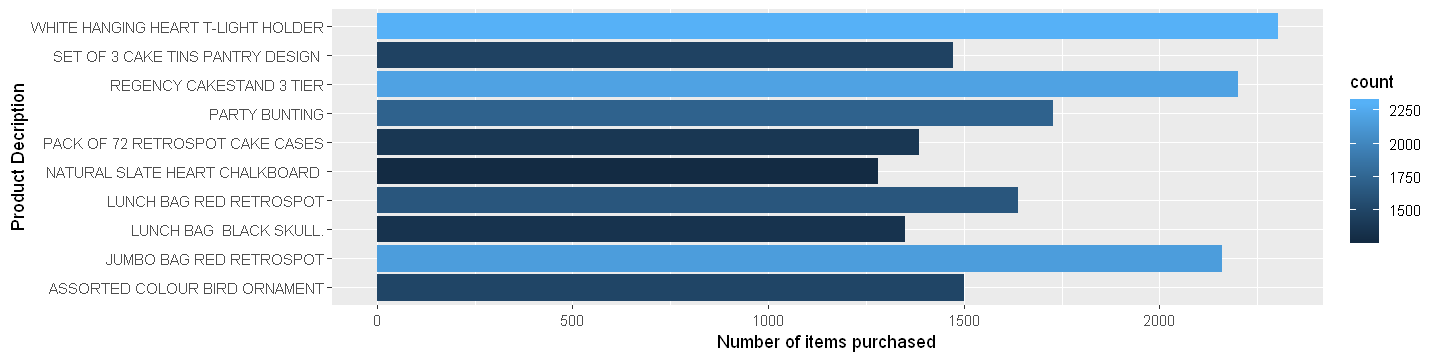

In [28]:
#Top 10 product
ProdSummary<-df %>% 
    group_by(StockCode, Description) %>% 
    summarise(count= n()) %>% 
    arrange(desc(count)) %>% 
    head(10) %>%
    ggplot(aes(x=Description, y=count, fill = count)) + geom_bar(stat= "identity") + coord_flip() + 
       labs(y="Number of items purchased", x="Product Decription")
ProdSummary

## Regularization

In [29]:
library("data.table")
set.seed(123)
#Date model
weekdaydetail2 <- weekdaydetail %>% na.omit()
new_table<-as.data.table(weekdaydetail2, keep.rownames=FALSE, na.rm=TRUE)
str(new_table)
summary(new_table)
is.data.table(new_table)==TRUE


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



Classes 'data.table' and 'data.frame':	305 obs. of  5 variables:
 $ date_only   : Date, format: "2010-12-01" "2010-12-02" ...
 $ dayOfWeek   : Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 4 5 6 1 2 3 4 5 6 1 ...
 $ revenue     : num  58636 46207 45620 31384 53860 ...
 $ transactions: int  143 167 108 95 133 111 148 183 91 51 ...
 $ aveOrd      : num  410 277 422 330 405 ...
 - attr(*, ".internal.selfref")=<externalptr> 


   date_only          dayOfWeek    revenue        transactions   
 Min.   :2010-12-01   Sun:50    Min.   : -1566   Min.   : 11.00  
 1st Qu.:2011-03-10   Mon:47    1st Qu.: 20728   1st Qu.: 62.00  
 Median :2011-06-14   Tue:52    Median : 27978   Median : 84.00  
 Mean   :2011-06-10   Wed:53    Mean   : 31960   Mean   : 84.92  
 3rd Qu.:2011-09-12   Thu:53    3rd Qu.: 42912   3rd Qu.:106.00  
 Max.   :2011-12-09   Fri:50    Max.   :112141   Max.   :218.00  
                      Sat: 0                                     
     aveOrd       
 Min.   : -20.61  
 1st Qu.: 288.73  
 Median : 346.57  
 Mean   : 374.35  
 3rd Qu.: 420.15  
 Max.   :1419.30  
                  

[1] TRUE

In [30]:
 ##Removing non numeric var and clean data
new_table[,transactions:=as.numeric(transactions)]
new_table[,dayOfWeek:=as.numeric(dayOfWeek)]
new_table[,c('date_only'):=NULL]
str(new_table)

Classes 'data.table' and 'data.frame':	305 obs. of  4 variables:
 $ dayOfWeek   : num  4 5 6 1 2 3 4 5 6 1 ...
 $ revenue     : num  58636 46207 45620 31384 53860 ...
 $ transactions: num  143 167 108 95 133 111 148 183 91 51 ...
 $ aveOrd      : num  410 277 422 330 405 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [31]:
#Separte train and test data (70/30)
indexTrain<-sample.int(nrow(new_table),nrow(new_table*0.7))
##no Reg
lmNoReg=lm(revenue~.,new_table[indexTrain])
summary(lmNoReg)
pred_no_reg=predict(lmNoReg,new_table[indexTrain])
sqrt(mean((pred_no_reg-new_table[indexTrain]$revenue)^2))


Call:
lm(formula = revenue ~ ., data = new_table[indexTrain])

Residuals:
     Min       1Q   Median       3Q      Max 
-16314.4  -1357.0   -108.3   1400.7  26523.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -27142.10     856.99 -31.671  < 2e-16 ***
dayOfWeek      -370.42     139.29  -2.659  0.00825 ** 
transactions    361.81       6.87  52.664  < 2e-16 ***
aveOrd           79.30       1.55  51.167  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3872 on 301 degrees of freedom
Multiple R-squared:  0.951,	Adjusted R-squared:  0.9506 
F-statistic:  1949 on 3 and 301 DF,  p-value: < 2.2e-16


[1] 3846.752

In [32]:
#Plot Coefficient Evaluation function
plotCoeffEvoluation=function(penalizedGlm,type='L1')
{
 require("ggplot2")
 lambda=penalizedGlm$lambda
 coeff=as.matrix(penalizedGlm$beta)
 rowName=rownames(coeff)
 coeff=data.table(coeff)
 coeff[,name:=rowName]
 coeff=melt(coeff,id.vars = 'name')
 coeff[,variable:=rep(lambda,each=length(unique(name)))]
 ggplot(coeff,aes(x=variable,y=value,color=name))+geom_line(size=1)+xlab(paste0(type,' regularisation'))+
    ylab('Value of coefficient')+scale_x_log10()
} 

Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"

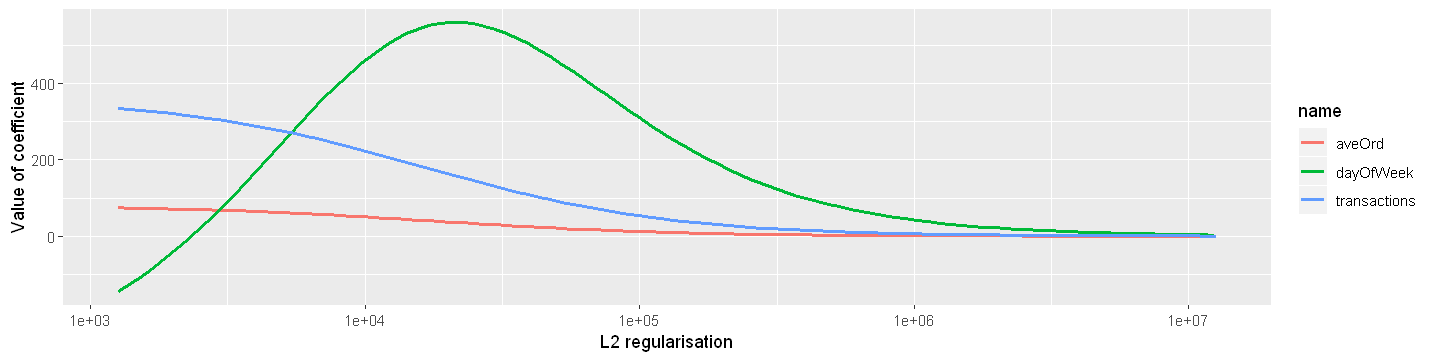

In [33]:
#Ridge Regression
alpha0.fit<- glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue),
                    alpha=0,family="gaussian")
##Apply fit line to testing data
alpha0.predicted<-data.table(predict(alpha0.fit,as.matrix(new_table[-indexTrain,-c('revenue'),with=F])))
RMSE_L2<-sqrt(apply(alpha0.predicted[,(.SD-new_table[-indexTrain]$revenue)^2,.SD=1:ncol(alpha0.predicted)],2,mean))
DF_L2_Plot<-data.frame(lambda=alpha0.fit$lambda,rmse=RMSE_L2)
plotCoeffEvoluation(alpha0.fit,'L2')

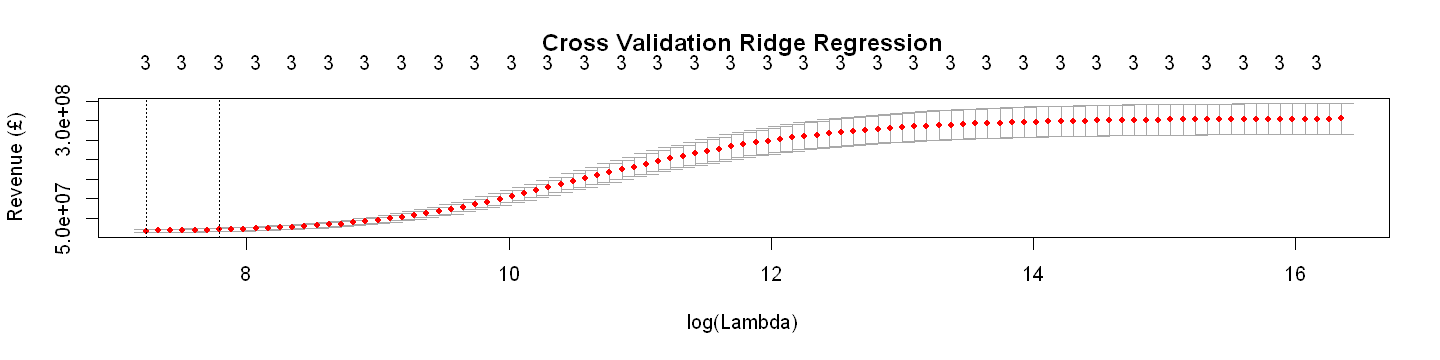

In [34]:
##plot cross validation - Ridge Regression
cv_fit_Ridge<-cv.glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue),
                    alpha=0,lambda=alpha0.fit$lambda)
plot(cv_fit_Ridge,ylab="Revenue (£)")
title(main="Cross Validation Ridge Regression",line=2)

Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"

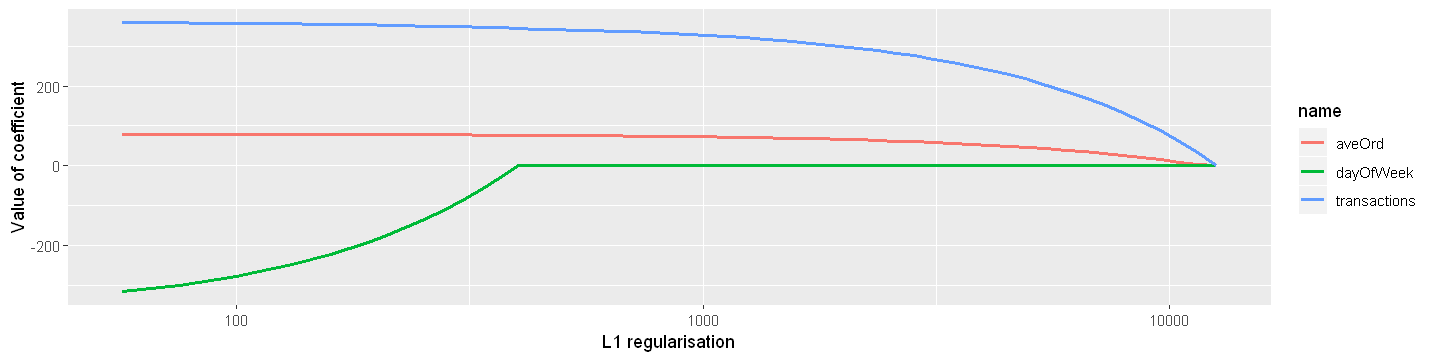

In [35]:
##L1 regularisation - Lasso Regression
alpha1.fit<-glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue), 
                   alpha=1,family="gaussian")
alpha1.predicted<- data.table(predict(alpha1.fit,as.matrix(new_table[-indexTrain,-c('revenue'),with=F])))
RMSE_L1<- sqrt(apply(alpha1.predicted[,(.SD-new_table[-indexTrain]$revenue)^2,.SD=1:ncol(alpha1.predicted)],2,mean))
DF_L1_plot<-data.frame(lambda=alpha1.fit$lambda,rmse=RMSE_L1)
plotCoeffEvoluation(alpha1.fit, "L1")

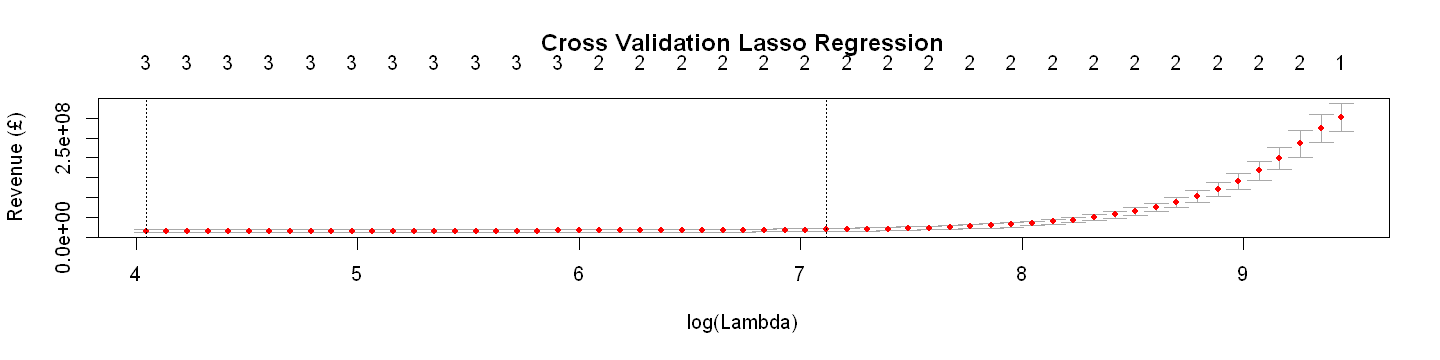

In [36]:
##plot cross validation - Lasso Regreesion
cv_fit_Lasso<-cv.glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue),
                    alpha=1,lambda=alpha1.fit$lambda)
plot(cv_fit_Lasso,ylab="Revenue (£)")
title(main="Cross Validation Lasso Regression",line=2)

Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"

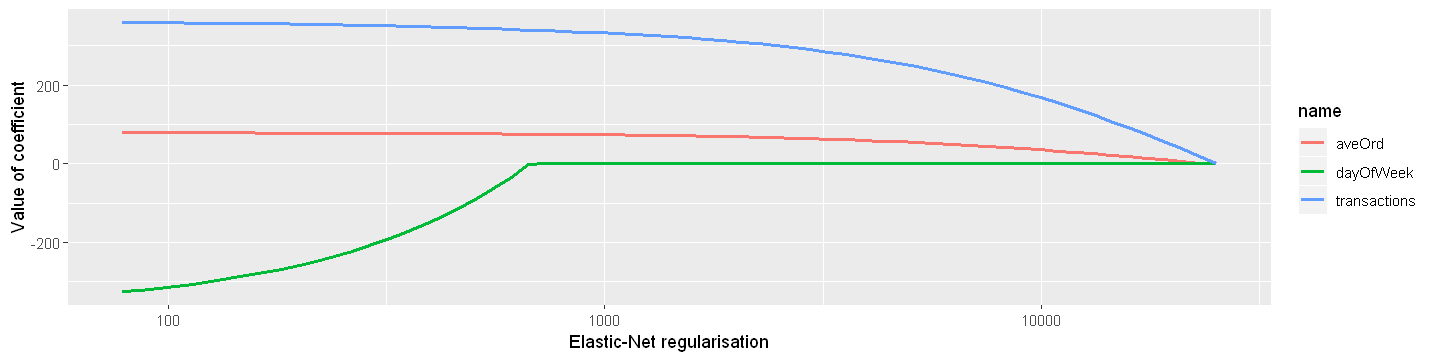

In [37]:
##L1L2 regularisation - Elastic-Net Regression
alpha0.5.fit = glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue), 
                 alpha=0.5,family="gaussian")
 
alpha0.5.predicted<-data.table(predict(alpha0.5.fit,as.matrix(new_table[-indexTrain,-c('revenue'),with=F])))
RMSE_L1L2<-sqrt(apply(alpha0.5.predicted[,(.SD-new_table[-indexTrain]$revenue)^2,.SD=1:ncol(alpha0.5.predicted)],2,mean))
DF_plot_L1L2<-data.frame(lambda=alpha0.5.fit$lambda,rmse=RMSE_L1L2)
plotCoeffEvoluation(alpha0.5.fit,"Elastic-Net")

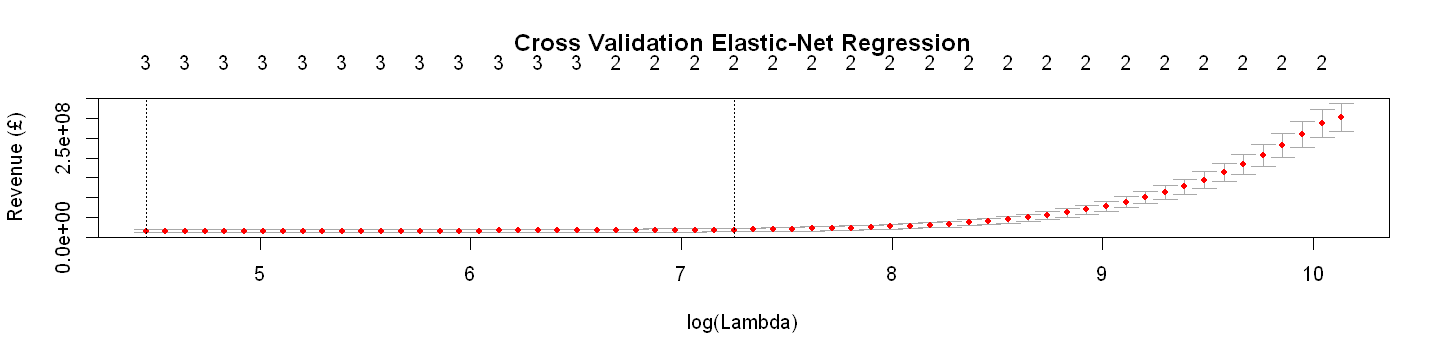

In [38]:
##plot Cross validation - Elastic Net Regression
cv_fit_ENR<- cv.glmnet(as.matrix(new_table[indexTrain,-c('revenue'),with=F]),as.matrix(new_table[indexTrain]$revenue),
                      alpha=0.5, lambda= alpha0.5.fit$lambda)
plot(cv_fit_ENR, ylab="Revenue (£)")
title(main="Cross Validation Elastic-Net Regression", line=2)

In [39]:
#Best Regression
best_lambda_R<-cv_fit_Ridge$lambda.1se
Ridge_coef<-cv_fit_Ridge$glmnet.fit$beta[,cv_fit_Ridge$lambda.1se==best_lambda_R]
best_lambda_L<-cv_fit_Lasso$lambda.1se
Lasso_coef<-cv_fit_Lasso$glmnet.fit$beta[,cv_fit_Lasso$lambda.1se==best_lambda_L]
best_lambda_ENR<-cv_fit_ENR$lambda.1se
ENR_coef<-cv_fit_ENR$glmnet.fit$beta[,cv_fit_ENR$lambda.1se==best_lambda_ENR]
paste(best_lambda_R,' ',best_lambda_L,' ',best_lambda_ENR)

[1] "2416.54943989813   1231.02362950052   1408.87396180237"

## Clustering - Kmeans

In [40]:
## Remove all NA data and prepare cluster dataset
df<-df %>% na.omit()
cluster_data<-df%>%
    group_by(CustomerID,Country)%>%
    summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo))

In [41]:
##Create Customer regularity
cus.Regularity = numeric()
for(i in 1:length(cluster_data$CustomerID)){
      cus.Regularity[i] = length(unique(df$date_only[df$CustomerID == cluster_data$CustomerID[i]]))}
cluster_data$cus.Regularity = cus.Regularity/13

In [42]:
#clarify UK customer and Non-UK customer
cluster_data$UK<- ifelse(test=grepl("United Kingdom", cluster_data$Country), yes = 1, no = 2)
cluster_data$CustomerID= as.numeric(cluster_data$CustomerID)
head(cluster_data)

CustomerID,Country,revenue,transactions,cus.Regularity,UK
12346,United Kingdom,0.00,2,0.07692308,1
12347,Iceland,4310.00,7,0.53846154,2
12348,Finland,1797.24,4,0.30769231,2
12349,Italy,1757.55,1,0.07692308,2
12350,Norway,334.40,1,0.07692308,2
12352,Norway,1545.41,11,0.53846154,2


Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"

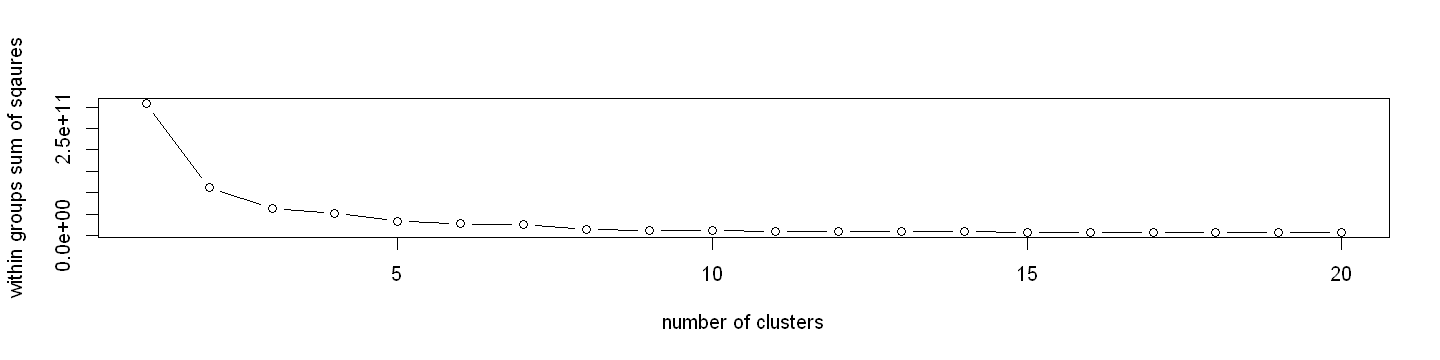

In [43]:
#K-means Clustering Type
set.seed(123)
test_input<- cluster_data[c("CustomerID","revenue","transactions","cus.Regularity")]
test_output<- cluster_data[,6]
test_data<- as.matrix(test_input)
test_output<-as.matrix(test_output)
#wss function
wssplot<- function(test_data, nc=20, seed=7){
    wss<-(nrow(test_data)-1)*sum(apply(test_data,2,var))
    for (i in 2:nc){
        set.seed(seed)
        wss[i]<- sum(kmeans(test_data, centers=i)$withinss)}
    plot(1:nc, wss,type="b", xlab= "number of clusters", ylab="within groups sum of sqaures")}

#test dataset within sum sqaures plot
wssplot(test_data, nc=20)


In [44]:
#Use NbClust package to get the optimize cluster number
res<-NbClust(test_data, distance="euclidean", min.nc=2, max.nc = 10, method = "ward.D2", index="duda")
res$Best.nc

Number_clusters     Value_Index 
         3.0000          0.1705

In [45]:
#k-means clustering
kmeans.model = kmeans(test_data, centers = 3, nstart = 50)
table(test_output,kmeans.model$cluster)

           
test_output    1    2    3
          1 3922   26    2
          2  417    4    1

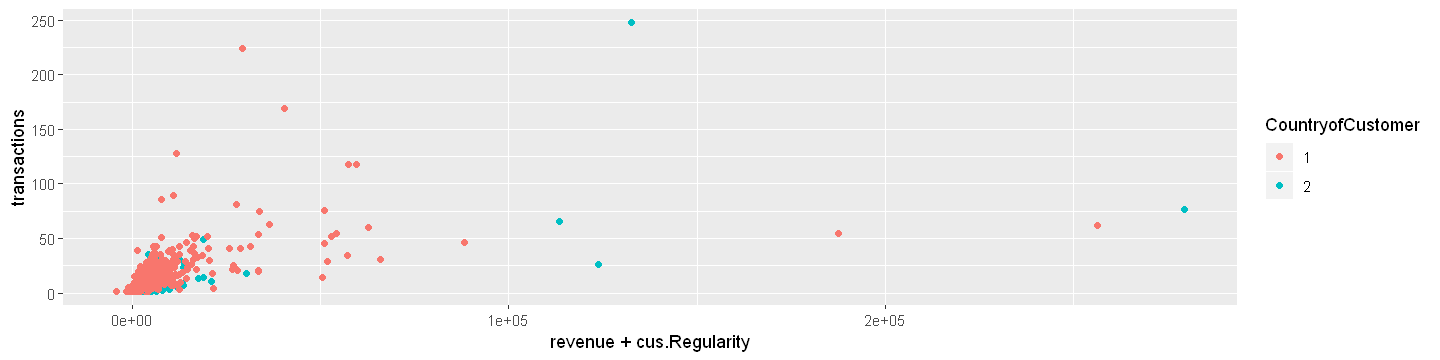

In [46]:
CountryofCustomer<- as.factor(test_output)
Order_Market<-ggplot(test_input, aes(x=revenue+cus.Regularity,y=transactions,col=CountryofCustomer))+ geom_point()
Order_Market

## Time Series Analysis

In [76]:
#Sales time series summary
pivot_sales<-df %>%
  group_by(year,date_only) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  ungroup()

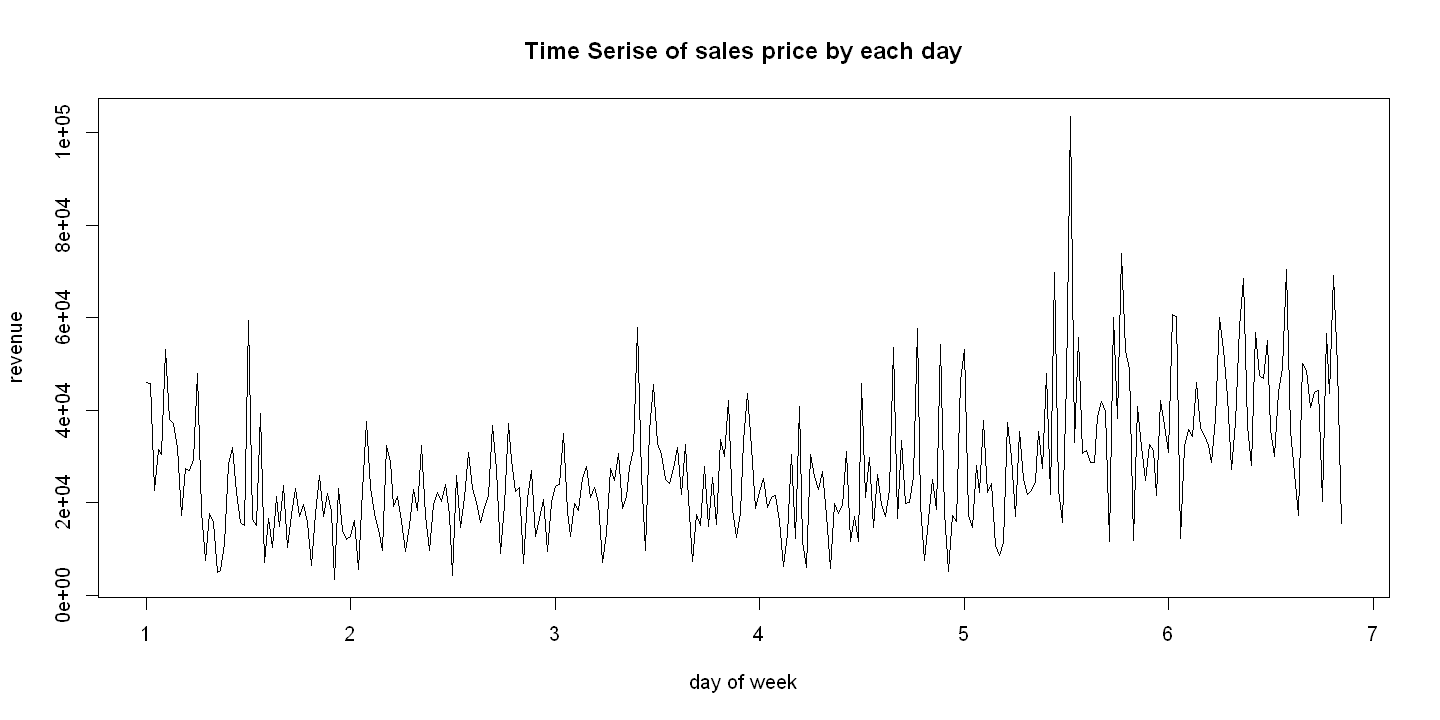

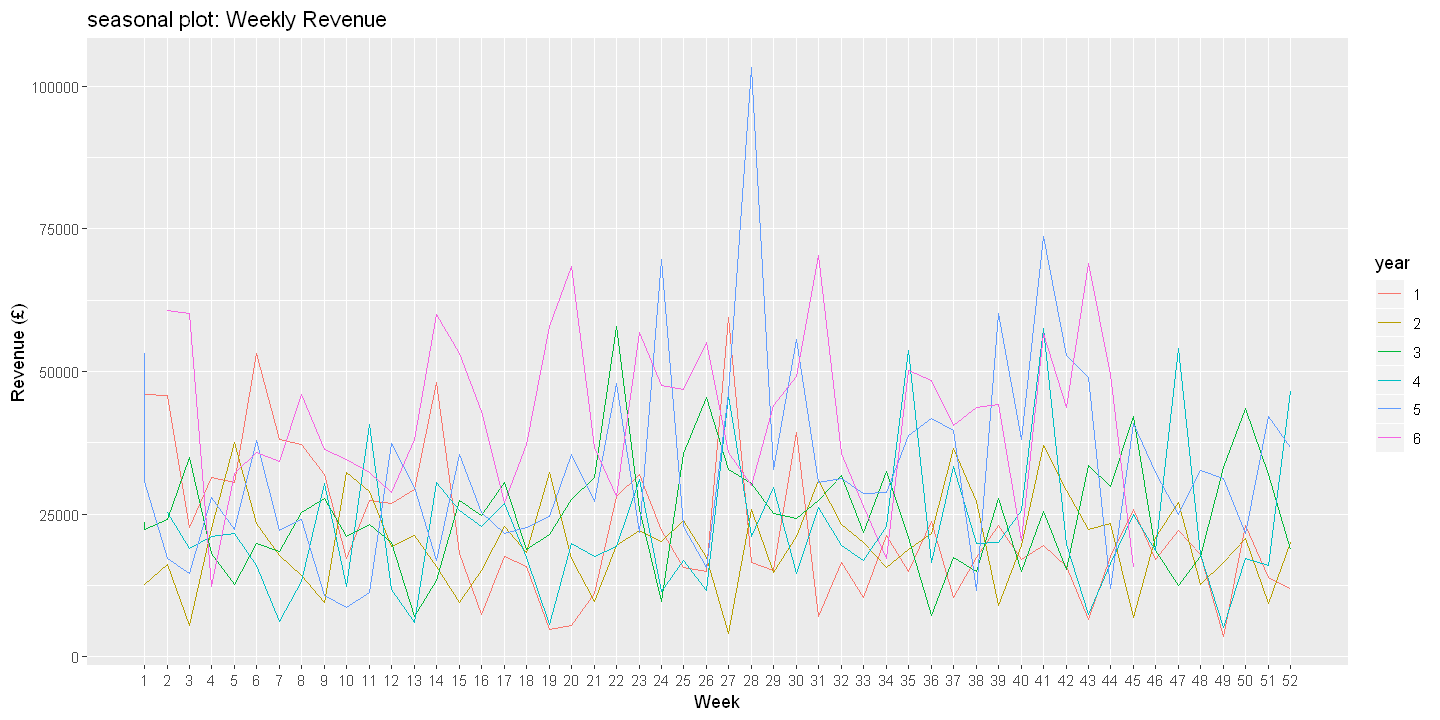

In [78]:
#Sales time series by day
options(repr.plot.width=12, repr.plot.height=6)
pivot_sales<-as.data.frame(pivot_sales)
tsdata.sales<-msts(pivot_sales$revenue, seasonal.periods=c(52))
plot(tsdata.sales, main="Time Serise of sales price by each day", ylab="revenue", xlab="day of week")
#sales seasonal plot
ggseasonplot(tsdata.sales, season.labels=NULL) + ylab("Revenue (£)") +ggtitle("seasonal plot: Weekly Revenue")

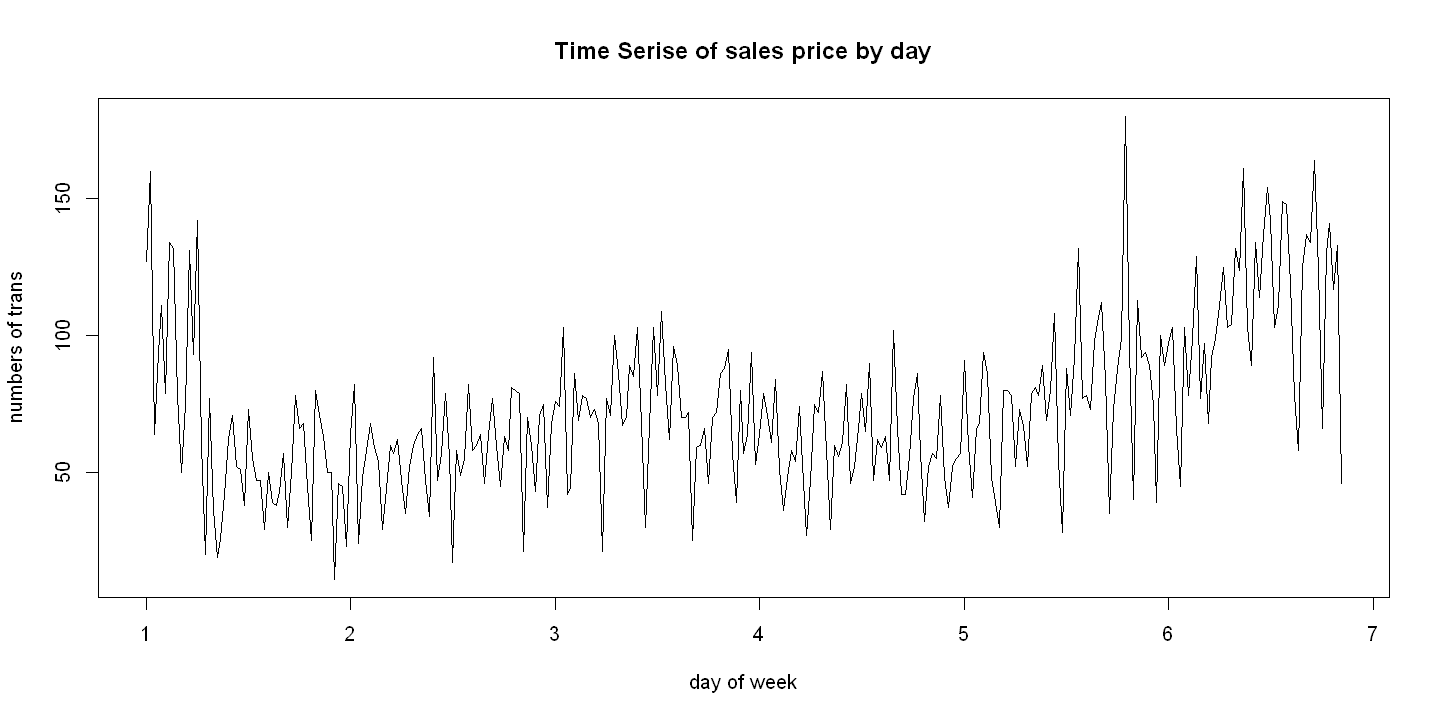

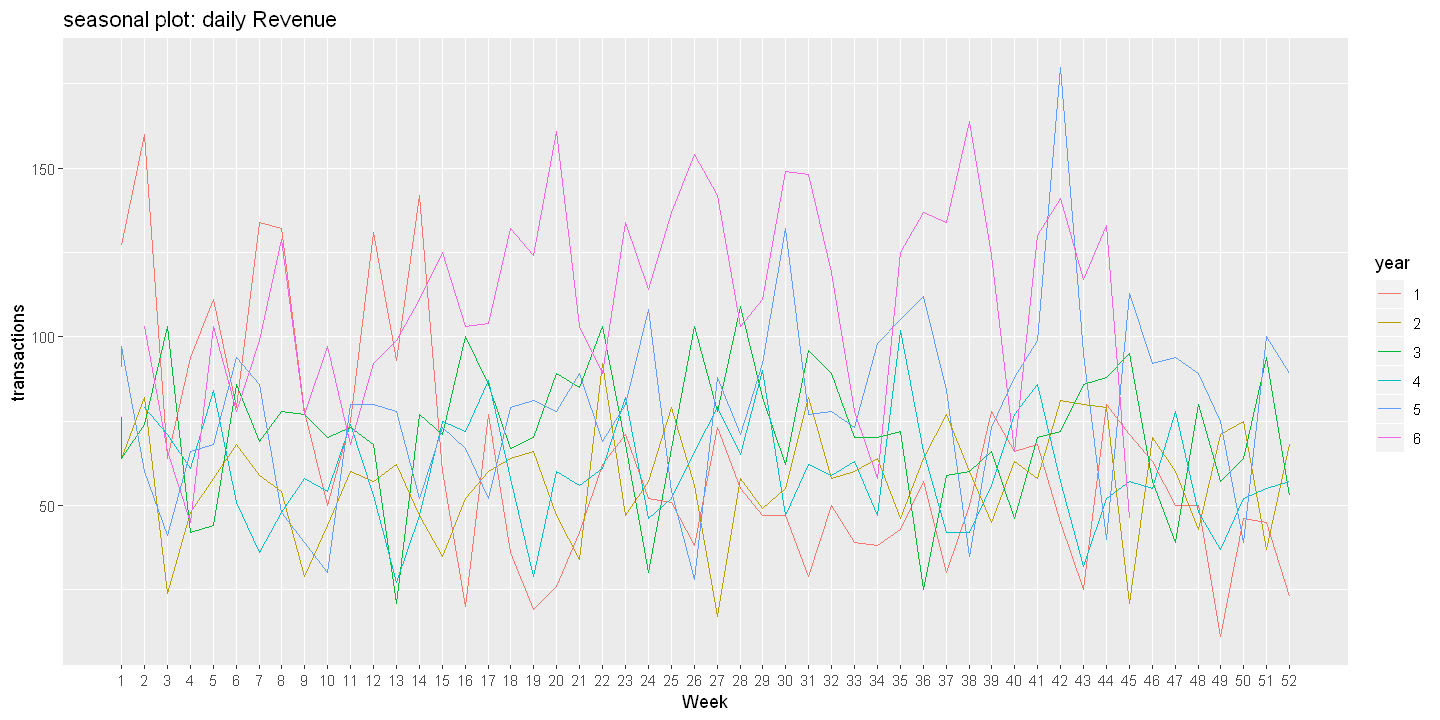

In [79]:
#transacions time series by day
tsdata.trans<-msts(pivot_sales$transactions, seasonal.periods=c(52))
plot(tsdata.trans, main="Time Serise of sales price by day", ylab="numbers of trans", xlab="day of week")
#sales seasonal plot
ggseasonplot(tsdata.trans) + ylab("transactions") +ggtitle("seasonal plot: daily Revenue")

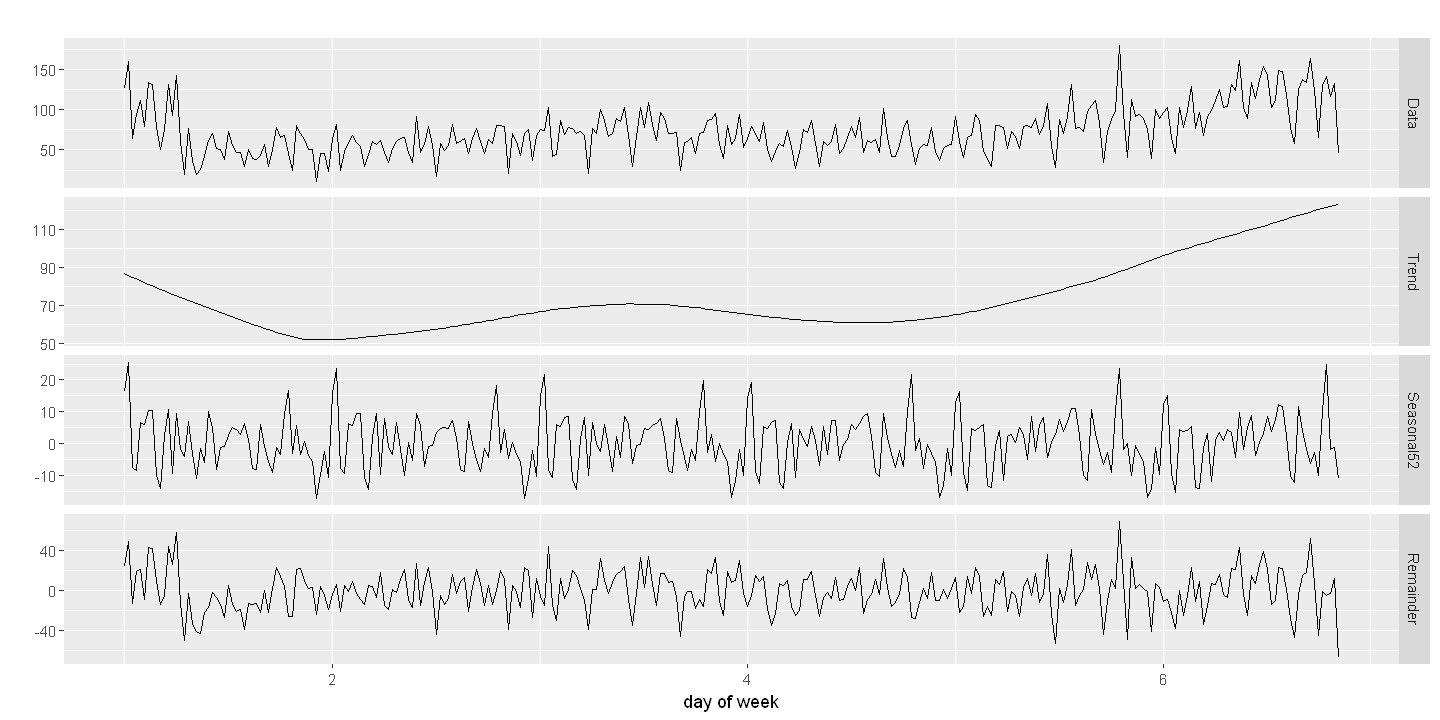

In [50]:
#STL with multiple seasonal period for transaction
tsdata.trans %>% mstl() %>%
  autoplot() + xlab("day of week")

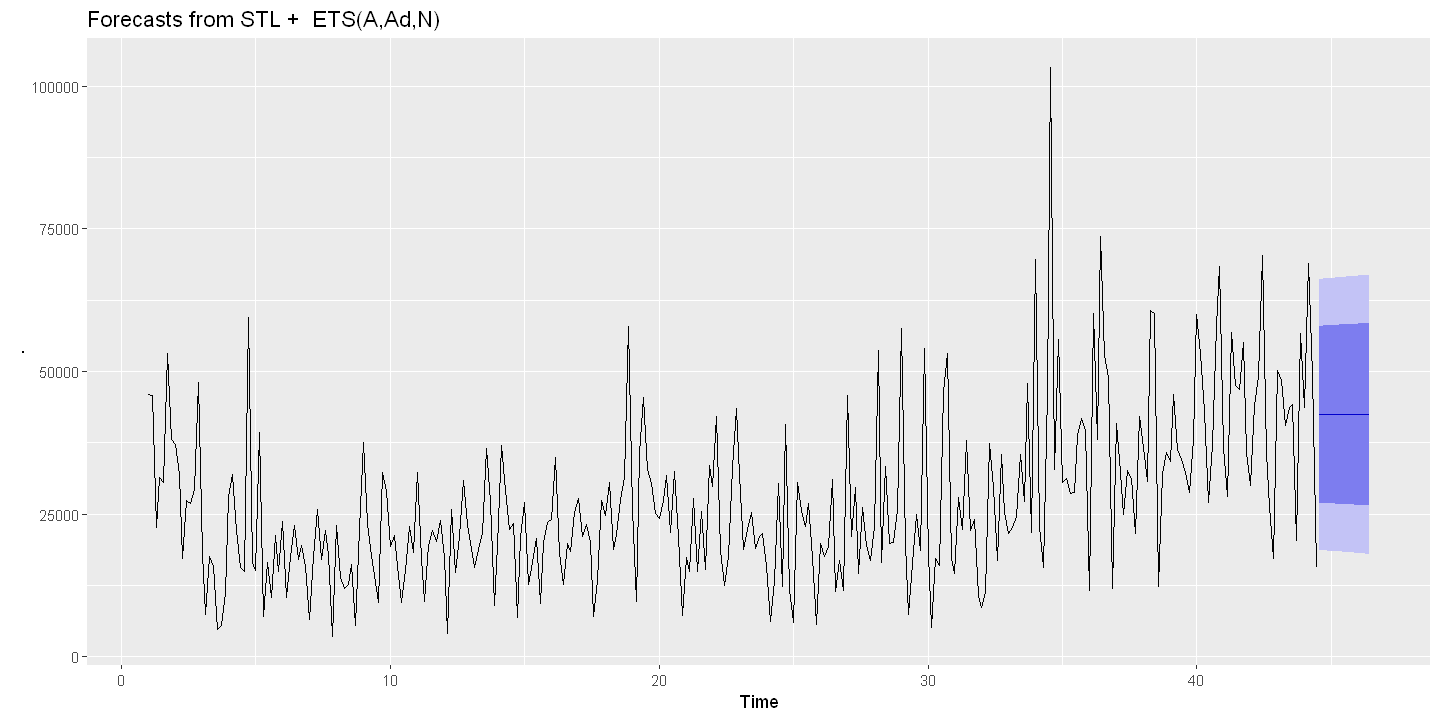

In [87]:
#Forecast sales by day of week
#Sales time series summary
Sales<-df %>%
  group_by(year,date_only) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) 
Sales<-as.data.frame(Sales)
msts.sales<-msts(Sales$revenue, seasonal.periods=c(7))

Forecastsales<-msts.sales %>% stlf() %>% autoplot()
Forecastsales

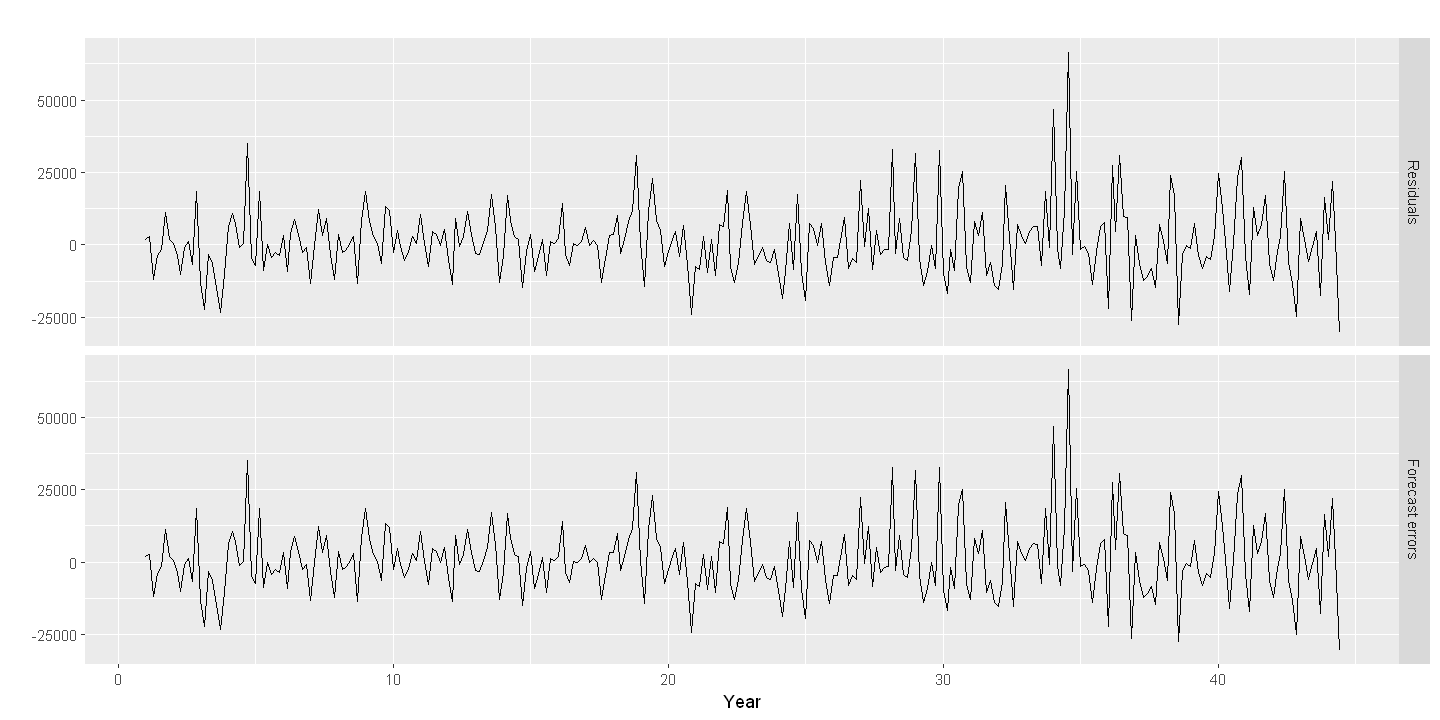

In [93]:
Forecastsalespoint<-msts.sales %>% stlf()
cbind('Residuals' = residuals(Forecastsalespoint),
      'Forecast errors' = residuals(Forecastsalespoint,type='response')) %>%
  autoplot(facet=TRUE) + xlab("Year") + ylab("")

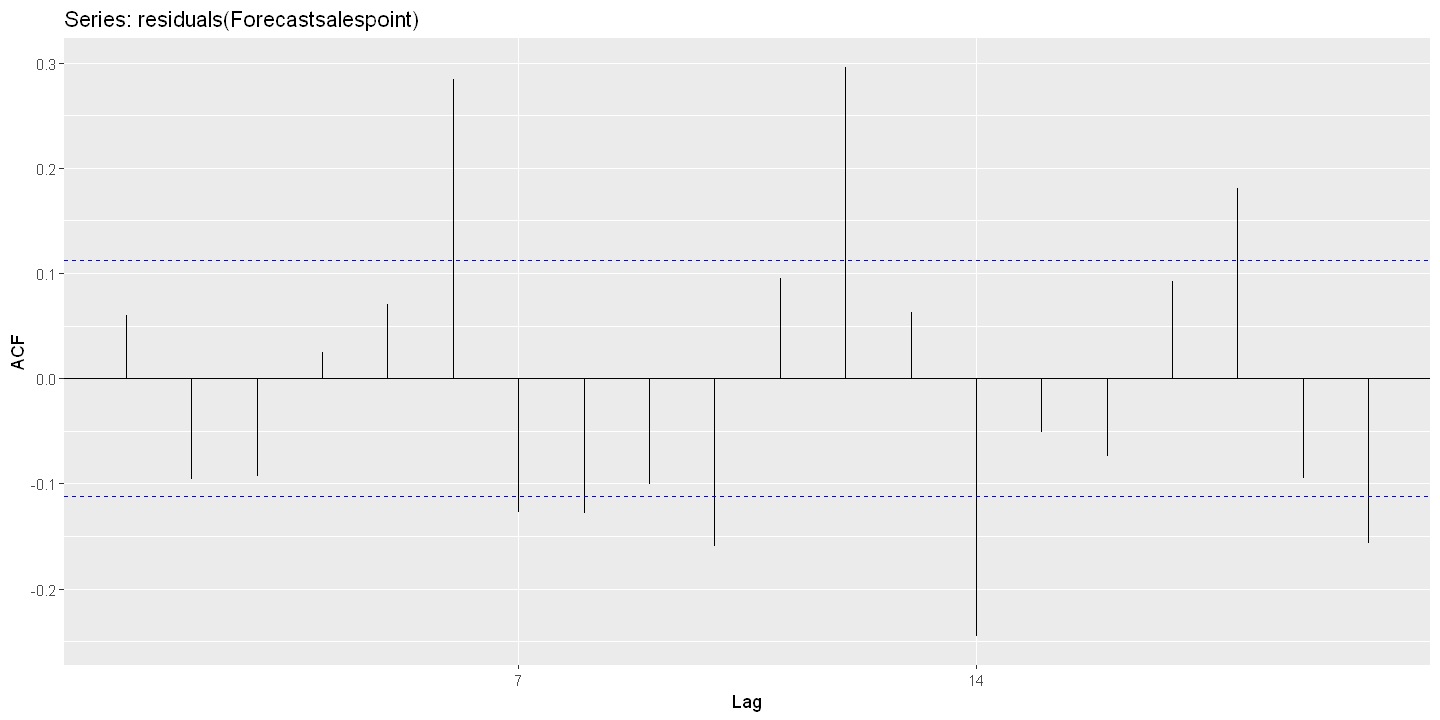

In [94]:
##ACF autocorrelation sales
ggAcf(residuals(Forecastsalespoint), lag=20)


In [95]:
Box.test(residuals(Forecastsalespoint), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  residuals(Forecastsalespoint)
X-squared = 133.97, df = 20, p-value < 2.2e-16
